In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 30

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume')
])

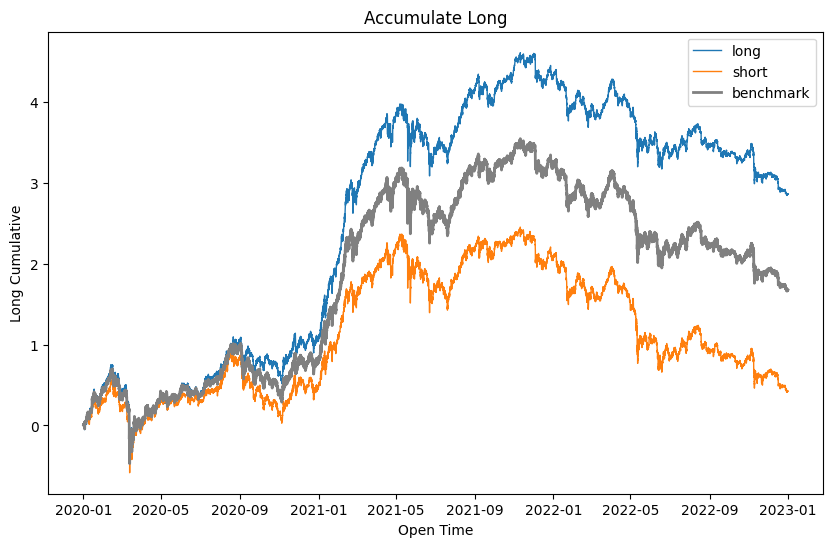

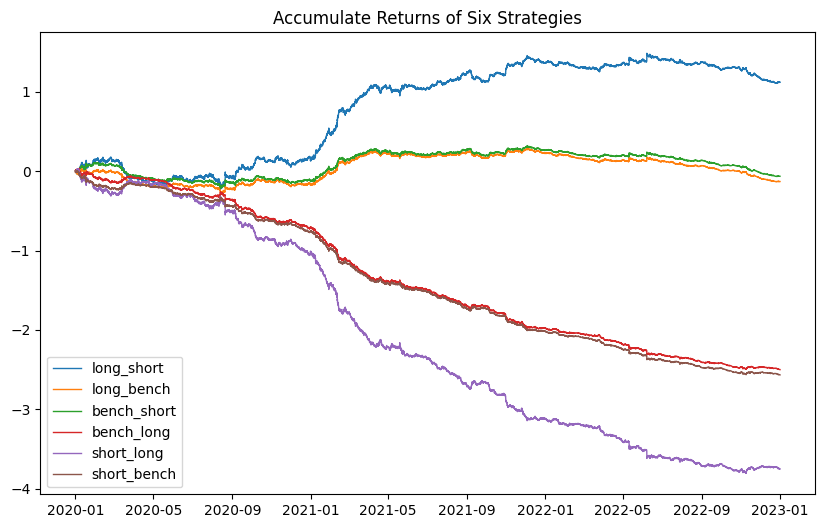

long: 
ann_return = 0.9527  sharpe = 0.8722  maxdd = 0.6831  calmar_ratio = 1.3946  

short: 
ann_return = 0.1404  sharpe = 0.1279  maxdd = 0.7357  calmar_ratio = 0.1909  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 0.3742  sharpe = 1.3518  maxdd = 0.3448  calmar_ratio = 1.0853  

long_bench: 
ann_return = -0.0429  sharpe = -0.3012  maxdd = 0.3285  calmar_ratio = -0.1305  

bench_long: 
ann_return = -0.8331  sharpe = -5.8535  maxdd = 2.4483  calmar_ratio = -0.3403  

short_long: 
ann_return = -1.2502  sharpe = -4.5161  maxdd = 3.7197  calmar_ratio = -0.3361  

short_bench: 
ann_return = -0.8551  sharpe = -6.0764  maxdd = 2.5573  calmar_ratio = -0.3344  

bench_short: 
ann_return = -0.0209  sharpe = -0.1485  maxdd = 0.2943  calmar_ratio = -0.071  



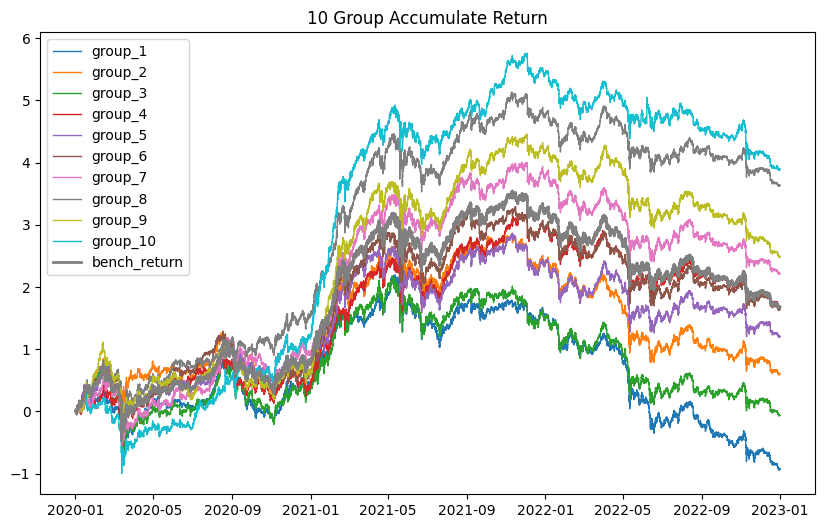

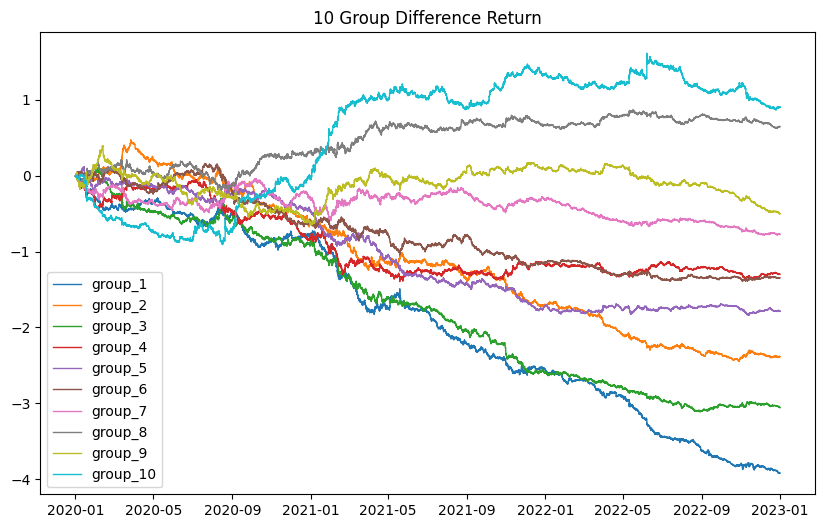

group_1: 
ann_return = -0.3097  sharpe = -0.2887  maxdd = 0.9819  calmar_ratio = -0.3154  

group_2: 
ann_return = 0.2011  sharpe = 0.173  maxdd = 0.5939  calmar_ratio = 0.3386  

group_3: 
ann_return = -0.0218  sharpe = -0.0184  maxdd = 0.8194  calmar_ratio = -0.0265  

group_4: 
ann_return = 0.5625  sharpe = 0.4831  maxdd = 0.7531  calmar_ratio = 0.7469  

group_5: 
ann_return = 0.4015  sharpe = 0.3513  maxdd = 0.6916  calmar_ratio = 0.5805  

group_6: 
ann_return = 0.5475  sharpe = 0.4765  maxdd = 0.6878  calmar_ratio = 0.796  

group_7: 
ann_return = 0.7378  sharpe = 0.649  maxdd = 0.7051  calmar_ratio = 1.0464  

group_8: 
ann_return = 1.2107  sharpe = 1.0584  maxdd = 0.5964  calmar_ratio = 2.0302  

group_9: 
ann_return = 0.8283  sharpe = 0.7331  maxdd = 0.7133  calmar_ratio = 1.1613  

group_10: 
ann_return = 1.2955  sharpe = 1.1291  maxdd = 0.9957  calmar_ratio = 1.3011  

-----------------------------------------
group_difference_1: 
ann_return = -1.3052  sharpe = -3.539  maxd

In [2]:
factors = df.select(['open_time', 'symbol', 'net_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()